In [44]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [46]:
import numpy as np
import pandas as pd

In [48]:
coffee_production = pd.read_csv('/Users/puchku-home/Study/Python Libs/Data Viz with Matplotlib & Seaborn/Data/coffee/total-production.csv').T
coffee_production.columns = coffee_production.iloc[0]
coffee_production = coffee_production.drop("total_production")

coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [50]:
top10_producers = coffee_production.sum().sort_values(ascending=False).iloc[:10]
top10_producers.head()

total_production
Brazil       1190965.7353
Viet Nam      439540.9519
Colombia      345871.4464
Indonesia     245116.7707
Ethiopia      141542.8931
dtype: object

In [52]:
top5 = coffee_production.loc[:, ["Brazil", "Viet Nam", "Colombia", "Indonesia", "Ethiopia"]]
top5.index = top5.index.astype("datetime64[ns]")

top5.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
1990-01-01,27285.6286,1310.288,14396.0,7441.383,2909.451
1991-01-01,27293.4934,1437.848,17980.397,8493.196,2924.664
1992-01-01,34603.3542,2340.447,14946.878,5569.478,1825.171
1993-01-01,28166.9786,3020.216,11422.422,6743.288,2967.004
1994-01-01,28192.047,3631.609,12964.0,5367.878,2762.73


Text(0.5, 1.0, 'Top 5 cofee producers')

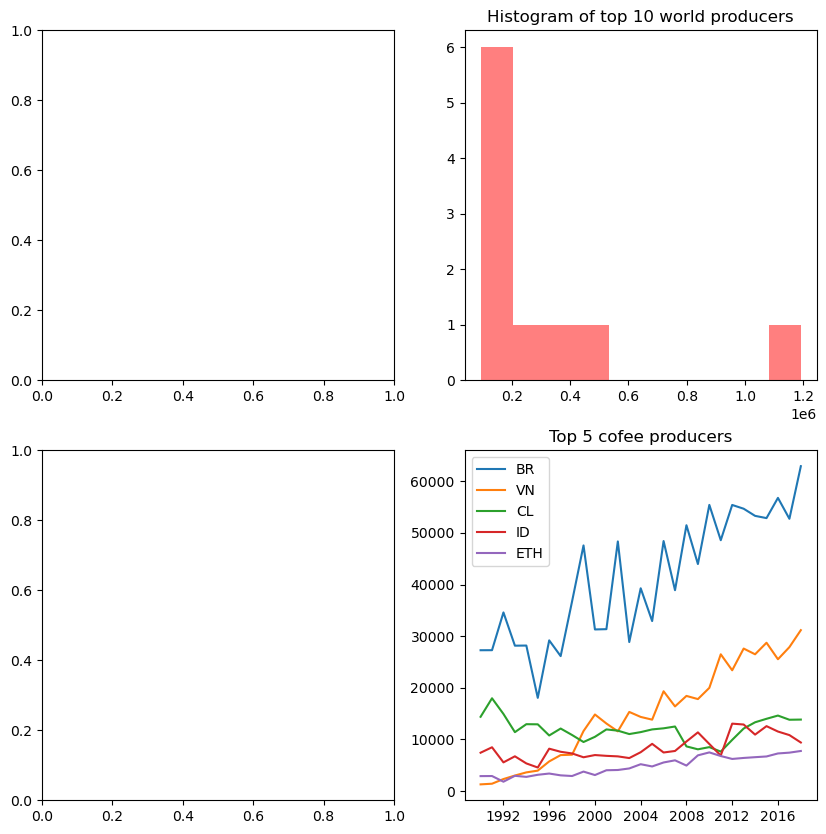

In [54]:
fig,ax = plt.subplots(2,2,figsize=(10,10)) 

ax[0][1].hist(top10_producers,alpha=0.5,color="red")
ax[0][1].set_title("Histogram of top 10 world producers")


ax[1][1].plot(top5.index,top5["Brazil"],label="BR")
ax[1][1].plot(top5.index,top5["Viet Nam"],label="VN")
ax[1][1].plot(top5.index,top5["Colombia"],label="CL")
ax[1][1].plot(top5.index,top5["Indonesia"],label="ID")
ax[1][1].plot(top5.index,top5["Ethiopia"],label="ETH")

ax[1][1].legend()

ax[1][1].set_title("Top 5 cofee producers")

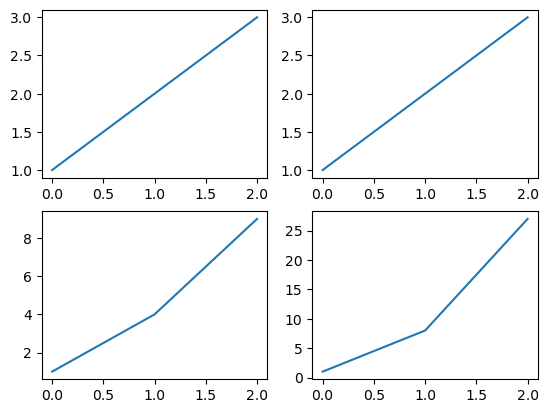

In [56]:
fig = plt.figure(3)

x = [0, 1, 2]

data = [1, 2, 3]
data2 = [1, 4, 9]
data3=[1,8,27]

ax=fig.add_subplot(221)
ax1=fig.add_subplot(222)
ax2=fig.add_subplot(223)
ax3=fig.add_subplot(224)

ax.plot(x,data)
ax1.plot(x,data)
ax2.plot(x,data2)
ax3.plot(x,data3)


In [58]:
housing_raw = pd.read_csv('/Users/puchku-home/Study/Python Libs/Data Viz with Matplotlib & Seaborn/Data/housing_data.csv', 
                      parse_dates=["period_begin", "period_end"],
)

ca_housing = (
    housing_raw
    .loc[(housing_raw["region_name"].str.contains("CA"))]
    .assign(region_name = housing_raw["region_name"].str[0:-11])
    .set_index("period_begin").sort_index()
)

ca_housing_pivot = ca_housing.pivot_table(index="period_begin",
                                          columns = "region_name",
                                          values = "median_active_list_price").assign(
                                          CA_average = lambda x: x.mean(axis=1))

ca_housing_markets = ca_housing_pivot.loc[:, ["San Francisco", 
                                              "Los Angeles", 
                                              "San Diego", 
                                              "Tulare"]]

ca_housing_markets.head()

region_name,San Francisco,Los Angeles,San Diego,Tulare
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,225395.8
2017-01-09,1233393.7,614061.0,621737.5,227729.1
2017-01-16,1239977.0,617311.0,625820.8,229060.4
2017-01-23,1247977.0,620644.3,629491.6,229806.2
2017-01-30,1253310.4,624541.6,632824.0,230139.5


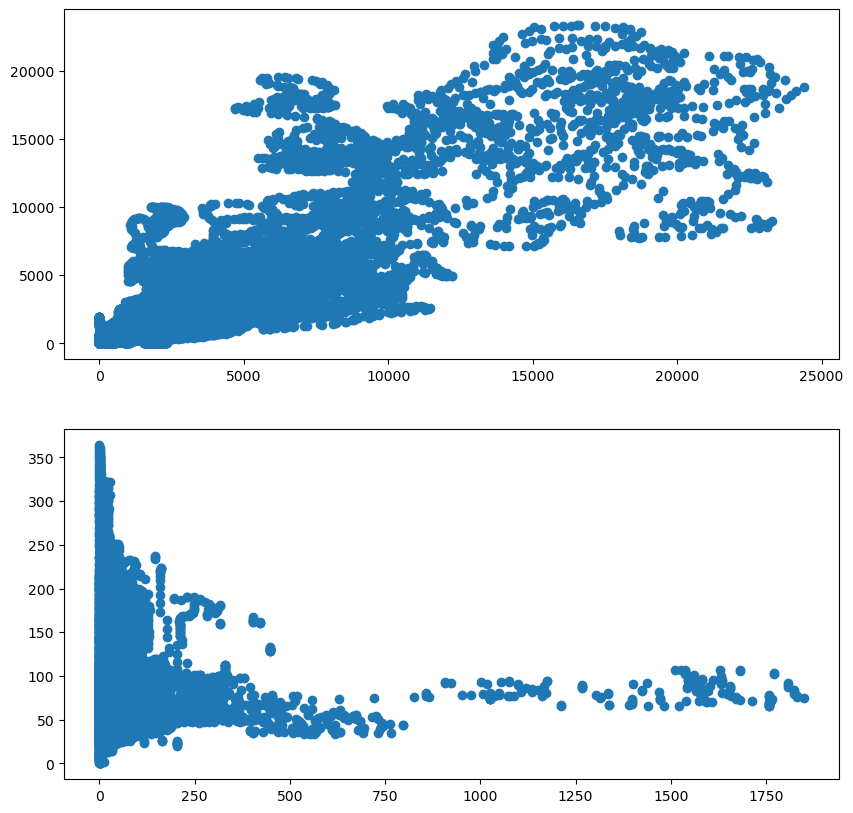

In [60]:
fig,ax = plt.subplots(2,1,figsize=(10,10),
                      #sharex='all',sharey='all'
                     )

ax[0].scatter(housing_raw.loc[:, "total_homes_sold"], housing_raw.loc[:, "inventory"])
ax[1].scatter(housing_raw.loc[:, "months_of_supply"], housing_raw.loc[:, "age_of_inventory"])

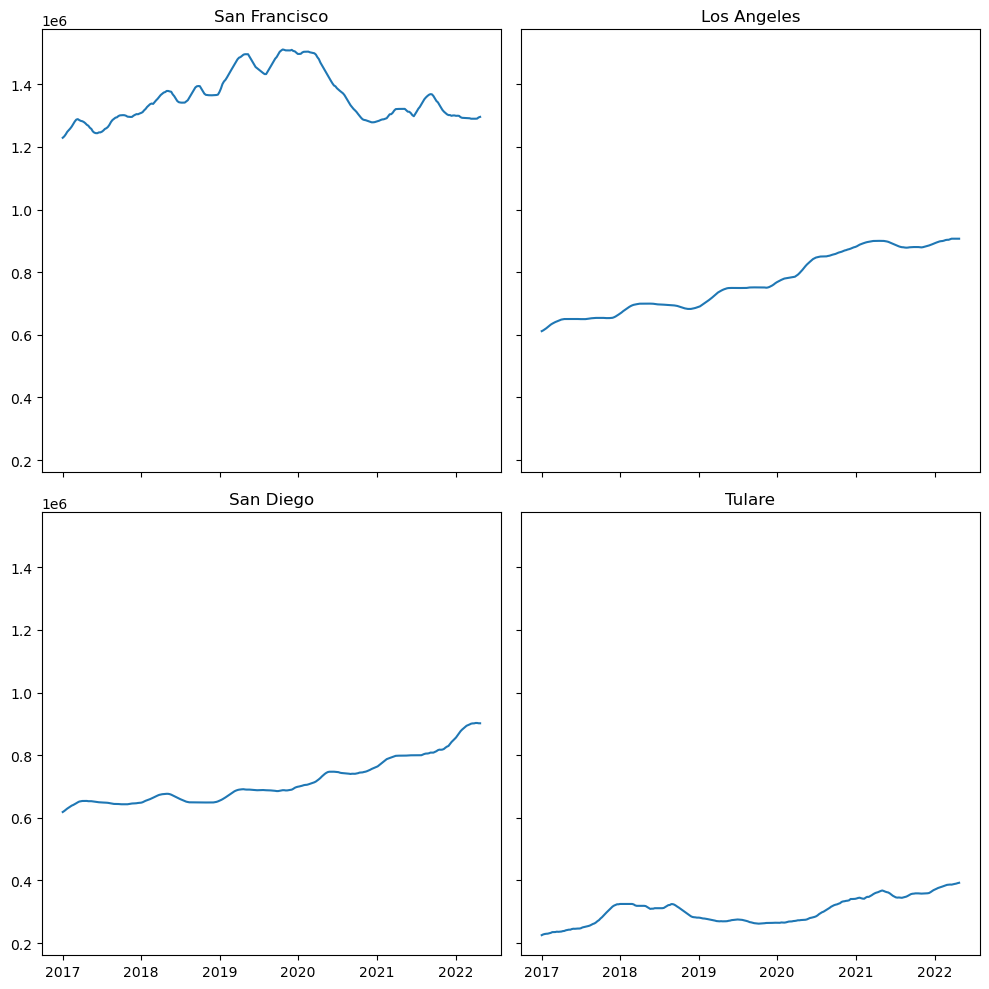

In [62]:
fig,ax = plt.subplots(2,2,figsize=(10,10),sharex='all',sharey='all')

ax[0][0].plot(ca_housing_markets.index,ca_housing_markets["San Francisco"])
ax[0][0].set_title("San Francisco")

ax[0][1].plot(ca_housing_markets.index,ca_housing_markets["Los Angeles"])
ax[0][1].set_title("Los Angeles")

ax[1][0].plot(ca_housing_markets.index,ca_housing_markets["San Diego"])
ax[1][0].set_title("San Diego")

ax[1][1].plot(ca_housing_markets.index,ca_housing_markets["Tulare"])
ax[1][1].set_title("Tulare")

plt.tight_layout()